10 first samples of the dataset:    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
10 last samples of the dataset:      sepal_length  sepal_width  petal_length  petal_width         species
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3

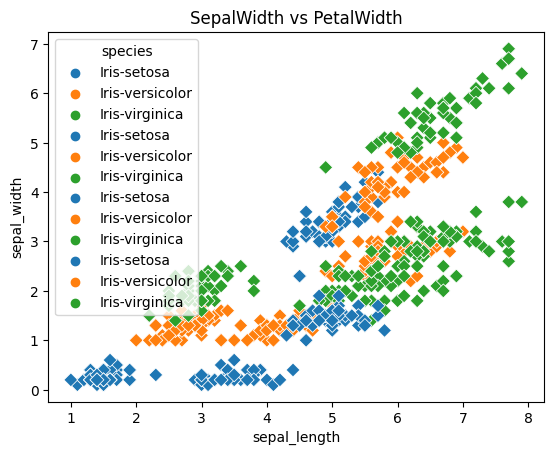

In [19]:
# Import required libraries
!pip install flask
import keras  # Library for neural network
import pandas as pd  # Loading data in table form
import seaborn as sns  # Visualization
import matplotlib.pyplot as plt  # Visualization
import numpy as np  # Linear algebra
from sklearn.preprocessing import normalize  # Machine learning algorithm library

# Load the dataset
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

# Load the Iris dataset from a CSV file
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IRIS.csv")

# Display the first 10 samples of the dataset
print("10 first samples of the dataset:", data.head(10))

# Display the last 10 samples of the dataset
print("10 last samples of the dataset:", data.tail(10))

# Visualizing the dataset
# Assuming you already loaded the dataset into the 'data' variable
# (Note: You are loading the dataset again, but it's not necessary since you loaded it above)
# Remove the following line if it's not needed:


# Visualize Sepal Length vs Sepal Width
sns.scatterplot(x='sepal_length', y='sepal_width',
                data=data,
                hue="species",
                marker="D", s=50)
plt.title('SepalLength vs SepalWidth')

# Visualize Petal Length vs Petal Width
sns.scatterplot(x='petal_length', y='petal_width',
                data=data,
                hue="species",
                marker="D", s=50)
plt.title('PetalLength vs PetalWidth')

# Visualize Sepal Length vs Petal Length
sns.scatterplot(x='sepal_length', y='petal_length',
                data=data,
                hue="species",
                marker="D", s=50)
plt.title('SepalLength vs PetalLength')

# Visualize Sepal Width vs Petal Width
sns.scatterplot(x='sepal_width', y='petal_width',
                data=data,
                hue="species",
                marker="D", s=50)
plt.title('SepalWidth vs PetalWidth')

plt.show()


In [24]:
print(data["species"].unique())
data.loc[data["species"]=="Iris-setosa","species"]=0
data.loc[data["species"]=="Iris-versicolor","species"]=1
data.loc[data["species"]=="Iris-virginica","species"]=2
print(data.head())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [26]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

     sepal_length  sepal_width  petal_length  petal_width species
28            5.2          3.4           1.4          0.2       0
71            6.1          2.8           4.0          1.3       1
127           6.1          3.0           4.9          1.8       2
40            5.0          3.5           1.3          0.3       0
47            4.6          3.2           1.4          0.2       0


**Converting data to numpy array in order for** **processing**

In [29]:
X=data.iloc[:,1:5].values
y=data.iloc[:,4].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[3.4 1.4 0.2 0]
 [2.8 4.0 1.3 1]
 [3.0 4.9 1.8 2]]
Examples of y
 [0 1 2]


**NORMALIZATION**

In [30]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.09000348 0.02754646 0.01150299 0.        ]
 [0.07412052 0.07870418 0.07476947 0.06324555]
 [0.07941484 0.09641262 0.10352695 0.12649111]]


**Creating train,test and validation data**

In [44]:
#Creating train,test and validation data


# Creating train, test, and validation data
# Creating train, test, and validation data
total_length = len(data)
train_length = int(0.8 * total_length)
test_length = int(0.2 * total_length)

X_train = X_normalized[:train_length]
X_test = X_normalized[train_length:]
y_train = y[:train_length].astype(int)  # Convert to numpy array of integers
y_test = y[train_length:].astype(int)   # Convert to numpy array of integers

print("Length of train set x:", X_train.shape[0], "y:", y_train.shape[0])
print("Length of test set x:", X_test.shape[0], "y:", y_test.shape[0])



Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


**Neural Network module**

In [46]:
#Neural network module
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
#from keras.layers.normalization import BatchNormalization
from keras.layers import LSTM

#from keras.utils import np_utils
from keras.utils import to_categorical
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
#y_train=to_categorical(y_train,num_classes=3)
#y_test=to_categorical(y_test,num_classes=3)
#print("Shape of y_train",y_train.shape)
#print("Shape of y_test",y_test.shape)
# One-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Shape of y_train (120, 3)
Shape of y_test (30, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              5000      
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dense_10 (Dense)            (None, 300)               150300    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________

In [47]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 2s 145ms/step - loss: 1.0743 - accuracy: 0.5000 - val_loss: 1.0350 - val_accuracy: 0.6333
Epoch 2/10
6/6 [==============================] - 0s 24ms/step - loss: 0.9606 - accuracy: 0.6750 - val_loss: 0.8870 - val_accuracy: 0.6333
Epoch 3/10
6/6 [==============================] - 0s 24ms/step - loss: 0.7635 - accuracy: 0.6750 - val_loss: 0.6557 - val_accuracy: 0.6333
Epoch 4/10
6/6 [==============================] - 0s 23ms/step - loss: 0.5228 - accuracy: 0.7833 - val_loss: 0.3914 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 25ms/step - loss: 0.3184 - accuracy: 0.9500 - val_loss: 0.2125 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 0.1671 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 26ms/step - loss: 0.0801 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 8/10
6/6 [==========